# Switch cost vs. block size

In [1]:
import numpy as np

from model.VirtualRatFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
epoch_per_loop = 100
num_loop = 101
threshold_edge = 0.85
block_lengths = [5,10,15,20,30,40,50]
all_switch_cost_list = []
for i in range(len(block_lengths)):
    block_length = block_lengths[i]
    pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
        = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
    for i in range(10,110,10):
        try:
            matrices = load_weights("BlockTime/BlockTime-"+str(block_length)+"-"+str(i)+".pkl")
        except IOError:
            continue
        pro_block, pro_switch, anti_block, anti_switch = matrices
        pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
        anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
        pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
        anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)

    pro_switch_cost_matrix = pro_switch_matrix - pro_block_matrix
    anti_switch_cost_matrix = anti_switch_matrix - anti_block_matrix
    switch_cost_matrix = (pro_switch_cost_matrix + anti_switch_cost_matrix)/2

    large_enough = np.logical_and(pro_block_matrix > threshold_edge, anti_block_matrix > threshold_edge)
    time_steps = []

    switch_cost = []
    for i in range(large_enough.shape[0]):
        for j in range(large_enough.shape[1]):
            if large_enough[i,j]:
                switch_cost.append(switch_cost_matrix[i,j])
                break
    switch_cost = np.array(switch_cost)
    all_switch_cost_list.append(switch_cost)
all_switch_cost = list2np(all_switch_cost_list)

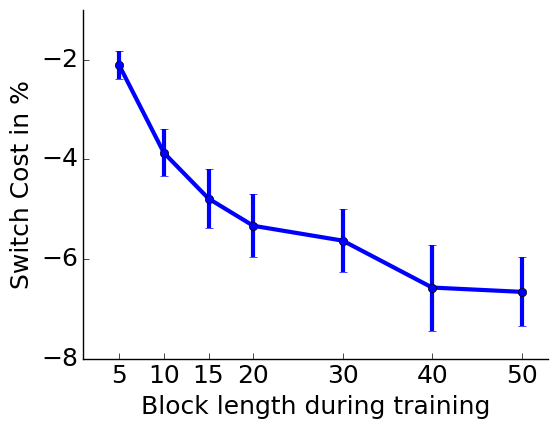

In [3]:
switch_cost_vs_block_length(block_lengths,switch_costs=all_switch_cost, exclude = True, individual = False, filename = "figures/Block.pdf")